In [1]:
import numpy as np
import sacpy as scp
import matplotlib.pyplot as plt

In [2]:
# load sst
sst = scp.load_sst()['sst']
sst

<xarray.DataArray 'sst' (time: 376, lat: 30, lon: 141)>
[1590480 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1991-01-16T12:00:00 ... 2022-04-16T12:00:00
  * lon      (lon) float64 20.0 22.0 24.0 26.0 28.0 ... 294.0 296.0 298.0 300.0
  * lat      (lat) float64 -29.0 -27.0 -25.0 -23.0 -21.0 ... 23.0 25.0 27.0 29.0

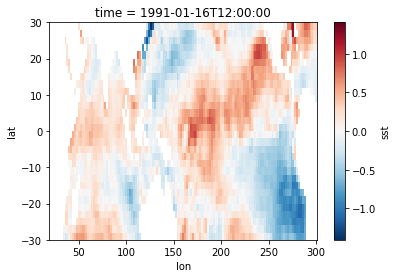

In [3]:
# get ssta
ssta = scp.get_anom(sst,method=1)
ssta[0].plot()

In [4]:
# calculate Nino3.4
Nino34 = ssta.loc[:,-5:5,190:240].mean(axis=(1,2))

In [5]:
linreg = scp.LinReg(np.array(Nino34),np.array(ssta))

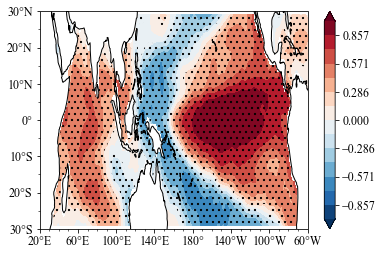

In [6]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.ticker import MultipleLocator
import cartopy.crs as ccrs
plt.rc('font', family='Times New Roman', size=12)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(ssta.lon,
                ssta.lat,
                linreg.corr,
                cmap="RdBu_r",
                levels=np.linspace(-1, 1, 15),
                extend="both",
                transform=ccrs.PlateCarree())
n = plt.contourf(ssta.lon,
                 ssta.lat,
                 linreg.p_value,
                 levels=[0, 0.05, 1],
                 zorder=1,
                 hatches=['..', None],
                 colors="None",
                 transform=ccrs.PlateCarree())
# xtk = np.arange(-180,181,60)
xtk = np.arange(20,301,40)
ax.set_xticks(xtk,crs=ccrs.PlateCarree())
# ax.set_xticks(xtk,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-30,31,10),crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.coastlines()
ax.set_aspect("auto")
plt.colorbar(m)
plt.savefig("../pic/nino34.png",dpi=200)

In [7]:
import scipy.stats as sts


def for_loop_reg(nino34, ssta):
    rvalue = np.zeros_like(ssta[0])
    p = np.zeros_like(ssta[0])
    for i in range(rvalue.shape[0]):
        for j in range(rvalue.shape[1]):
            res = sts.linregress(nino34, ssta[:, i, j])
            rvalue[i, j], p[i, j] = res.rvalue, res.pvalue
    return rvalue, p

rvalue, p = for_loop_reg(np.array(Nino34), np.array(ssta))

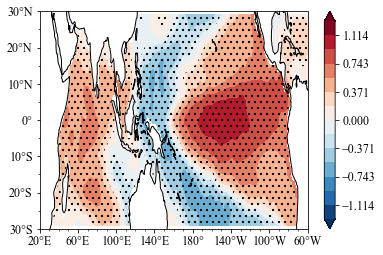

In [9]:
plt.rc('font', family='Times New Roman', size=12)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(ssta.lon,
                ssta.lat,
                rvalue,
                cmap="RdBu_r",
                levels=np.linspace(-1.3, 1.3, 15),
                extend="both",
                transform=ccrs.PlateCarree())
n = plt.contourf(ssta.lon,
                 ssta.lat,
                 p,
                 levels=[0, 0.05, 1],
                 zorder=1,
                 hatches=['..', None],
                 colors="None",
                 transform=ccrs.PlateCarree())
xtk = np.arange(20,301,40)
ax.set_xticks(xtk,crs=ccrs.PlateCarree())
# ax.set_xticks(xtk,crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-30,31,10),crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.coastlines()
ax.set_aspect("auto")
plt.colorbar(m)

In [8]:
# linear regression (ssta pattern ssta)
%time for i in range(10): linreg = scp.LinReg(np.array(Nino34),np.array(ssta))

CPU times: user 938 ms, sys: 844 ms, total: 1.78 s
Wall time: 376 ms


In [12]:
%time for i in range(10): rvalue, p = for_loop_reg(np.array(Nino34), np.array(ssta))

CPU times: user 21.1 s, sys: 0 ns, total: 21.1 s
Wall time: 21.2 s


## sacpy
wall time : 376 ms

## for_loop
Wall time: 21.2 s